In [1]:
import numpy as np
import pandas as pd
import copy
import dataclasses
import ipywidgets as widgets
from matplotlib import pyplot as plt 
from discrete_events import DiscreteEventSimulator, widget

The file `discrete_events.py` contains the implementation of a discrete event simulator, slightly more complex than the example seen in the lecture. Indeed, it allows the service to be interrupted, in order to allow the barman to have breaks. It works in the same way as a traffic light at an intersection. To deal with that, the procedure to manage the events is based on a heap queue. 

In [2]:
help(DiscreteEventSimulator)

Help on class DiscreteEventSimulator in module discrete_events:

class DiscreteEventSimulator(builtins.object)
 |  DiscreteEventSimulator(arrival_rate: float, service_time: float, red_time: float, green_time: float, closure_time: str)
 |  
 |  This class implements a simple discrete event simulator with:
 |  
 |  - an arrival process of customers that follows a Poisson process,
 |  - a service time that follows an exponential distribution,
 |  - a closure time, when no more arrival of customers is admitted,
 |  - an optional green/red light process, that interrupts the service 
 |        deterministically.
 |  
 |  To turn off the green/red light process, the parameters green_time
 |  and red_time must be set to None.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, arrival_rate: float, service_time: float, red_time: float, green_time: float, closure_time: str)
 |      Ctor
 |      
 |      :param arrival_rate: average number of arrivals per minute
 |      :type arrival_rate: flo

We first reproduce the example from the lecture. Note that the results are different than in the lecture, due to the stochastic nature of the simulation.

In [3]:
des_1 = DiscreteEventSimulator(
    arrival_rate=1,
    service_time=1,
    red_time=None,
    green_time=None,
    closure_time=10
)

The simulator is implemented as an interator. We simply perform a loop, and retrieve the state variables at each iteration.

In [4]:
states_1 = [copy.deepcopy(i.state) for i in des_1]

In [5]:
table_1 = pd.DataFrame.from_records([dataclasses.asdict(i) for i in states_1])
table_1

,time,nbr_of_arrivals,nbr_of_departures,nbr_of_customers,service_open,green,simulation_completed
0,0.184833,1,0,1,True,True,False
1,0.523440,2,0,2,True,True,False
2,0.745039,2,1,1,True,True,False
3,1.170675,2,2,0,True,True,False
4,3.585564,3,2,1,True,True,False
5,3.642184,3,3,0,True,True,False
6,4.101864,4,3,1,True,True,False
7,4.741704,4,4,0,True,True,False
8,5.276655,5,4,1,True,True,False
9,5.306091,6,4,2,True,True,False


We can visualize the process using the widget below

In [6]:
w_1 = widgets.interact(
        widget, 
        state_index=widgets.IntSlider(
            min=0, 
            max=len(states_1)-1, 
            step=1, 
            value=0
        ),
        states=widgets.fixed(states_1)
)

interactive(children=(IntSlider(value=0, description='state_index', max=22), Output()), _dom_classes=('widget-…

We now test the second example from the lecture

In [7]:
des_2 = DiscreteEventSimulator(
    arrival_rate=1,
    service_time=0.2,
    red_time=None,
    green_time=None,
    closure_time=10
)

In [8]:
states_2 = [copy.deepcopy(i.state) for i in des_2]

In [9]:
table_2 = pd.DataFrame.from_records([dataclasses.asdict(i) for i in states_2])
table_2

,time,nbr_of_arrivals,nbr_of_departures,nbr_of_customers,service_open,green,simulation_completed
0,1.000796,1,0,1,True,True,False
1,1.002142,1,1,0,True,True,False
2,1.114932,2,1,1,True,True,False
3,1.196242,2,2,0,True,True,False
4,2.891729,3,2,1,True,True,False
5,2.934556,3,3,0,True,True,False
6,5.752150,4,3,1,True,True,False
7,5.868957,4,4,0,True,True,False
8,6.799244,5,4,1,True,True,False
9,7.158971,5,5,0,True,True,False


In [10]:
w_2 = widgets.interact(
        widget, 
        state_index=widgets.IntSlider(
            min=0, 
            max=len(states_2)-1, 
            step=1, 
            value=0
        ),
        states=widgets.fixed(states_2)
)

interactive(children=(IntSlider(value=0, description='state_index', max=18), Output()), _dom_classes=('widget-…

Finally, we use the simulator to reproduce the example of the intersection from the lecture "Introduction to simulation", that was used to illustrate multi-modal distributions:
- intersection with capacity 2000 veh/h,
- traffic light: 30 seconds green, 30 seconds red,
- constant arrival rate: 2000 veh/h during 30 minutes,
- with 30% probability, capacity at 80%.

In [11]:
def simulate(aggregate_only=False):
    capacity = 2000 # veh/h
    if np.random.rand() <= 0.3:
        capacity *= 0.8
    service_time = 60 / capacity # in minutes
    des = DiscreteEventSimulator(    
        arrival_rate=2000/60, # veh/min
        service_time=service_time, # in minutes
        red_time=0.5, 
        green_time=0.5, 
        closure_time=30.0
    )
    
    states = None if aggregate_only else [copy.deepcopy(i.state) for i in des]
    agg_stats = des.agg_statistics()
    return states, agg_stats


Let's first perform one simulation

In [12]:
states_traffic, _ = simulate()

In [13]:
table_traffic = pd.DataFrame.from_records([dataclasses.asdict(i) for i in states_traffic])
table_traffic

,time,nbr_of_arrivals,nbr_of_departures,nbr_of_customers,service_open,green,simulation_completed
0,0.003344,1,0,1,True,True,False
1,0.013450,1,1,0,True,True,False
2,0.062088,2,1,1,True,True,False
3,0.083891,2,2,0,True,True,False
4,0.096250,3,2,1,True,True,False
...,...,...,...,...,...,...,...
2110,44.162308,1027,1023,4,False,True,False
2111,44.180499,1027,1024,3,False,True,False
2112,44.222824,1027,1025,2,False,True,False
2113,44.260991,1027,1026,1,False,True,False


In [14]:
w_traffic = widgets.interact(
        widget, 
        state_index=widgets.IntSlider(
            min=0, 
            max=len(states_traffic)-1, 
            step=1, 
            value=0
        ),
        states=widgets.fixed(states_traffic)
)

interactive(children=(IntSlider(value=0, description='state_index', max=2114), Output()), _dom_classes=('widge…

We now run the simulator a large number of times to obtain the distribution of the average time in the system.

In [15]:
number_of_draws = 10000

In [16]:
res = []
for i in range(number_of_draws):
    if i % 1000 == 0:
        print(f'{i}')
    _, s = simulate()
    total_duration, nbr_customers = s
    avg = total_duration / float(nbr_customers)
    res.append(avg)    
results = np.array(res)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [17]:
mean = np.array(results).mean() * 60

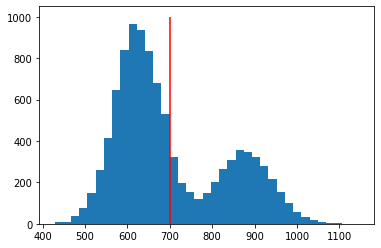

In [18]:
plt.hist([r * 60 for r in results], bins='fd')
plt.vlines(mean, 0, 1000, color='red')
plt.show()